In [17]:
#pip install opencv-python

In [407]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [28]:
def Im_Gray(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #greyscale convertion
    return(img_gray)

In [19]:
def Binary_Thresholding(img_gray):
    ret, img_thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY) #apply binary threshold
    #cv2.imwrite('image_thres1.jpg', thresh)
    return img_thresh

In [265]:
def Adaptive_Thresholding(image):
    
    img = cv.imread(image,0)
    img = cv.medianBlur(img,5)
   # ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    Mean_Thresh = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
                cv.THRESH_BINARY,11,2)
    Gausian_Thresh = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv.THRESH_BINARY,11,2)
    titles = ['Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [ Mean_Thresh, Gausian_Thresh]
    for i in range(2):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()   
    return Mean_Thresh, Gausian_Thresh

In [20]:
def Im_Countour(img_thresh):
    # detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
    contours, hierarchy = cv2.findContours(image=img_thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    # draw contours on the original image
    image_copy = image.copy()
    cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    return image_copy   

In [21]:
def Sharpening_Mask(image, kernel_size=(5, 5), sigma=1.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [207]:
def Canny_Edge(img_gray):
    canny_edges = cv2.Canny(img_gray, 120, 150) ##detect edges using canny
    return canny_edges

In [83]:
def Lap_Edge(image_gray):
    lap_edges = cv2.Laplacian(img_gray, cv2.CV_64F) #detect gradients, edges
    lap_edges = np.uint8(np.absolute(lap_edges))
    return lap_edges
    

In [77]:
def Sober_Edge(image_gray):
    #detect sobel gradients
    sobel_x_edges = cv.Sobel(gray_image, cv.CV_64F,1, 0)
    sobel_y_edges = cv.Sobel(gray_image, cv.CV_64F,0, 1)
    #convert all -ve pixels to positives
    sobel_x_edges = np.uint8(np.absolute(sobel_x_edges))
    sobel_y_edges = np.uint8(np.absolute(sobel_y_edges))
    return (sobel_x_edges,sobel_y_edges)
    

In [346]:
def Image_Show(image,title):
    plt.subplot(2,2,1),plt.imshow(image,'gray')
    plt.title(title)
    plt.xticks([]),plt.yticks([])
    plt.show()
def Img_Show(image,image_name):
    cv2.imshow(image_name,image)
    cv2.waitKey(2000)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [64]:
# attribute name with extension , example test.jpg
def Img_Save(canny_edges,name):
    cv2.imwrite(name,canny_edges) #canny edge detected image saved as jpg
    print('Image saved as ',name)

In [274]:
image = cv2.imread('test.png')

## NORMAL COUNTOUR METHOD

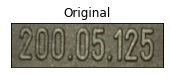

In [384]:
img = cv2.imread('test.png')
Image_Show(img,'Original')

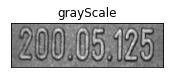

In [385]:
img_gray=Im_Gray(img)
Image_Show(img_gray,'grayScale')

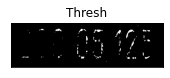

In [386]:
img_thresh=Im_Thresholding(img_gray)
Image_Show(img_thresh,'Thresh')

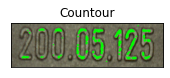

In [389]:
img_con= Im_Countour(img_thresh)
Image_Show(img_con,'Countour')

## EDGE WITH CANNY

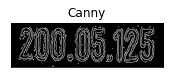

In [432]:
img_canny=Canny_Edge(img_gray)
Image_Show(img_canny,'Canny')

In [393]:
Img_Save(img_canny,'Img_canny.png')

Image saved as  Img_canny.png


In [398]:
img = cv2.imread('Img_canny.png')

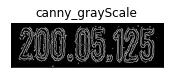

In [400]:
img_gray=Im_Gray(img)
Image_Show(img_gray,'canny_grayScale')

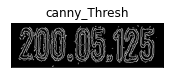

In [401]:
img_thresh=Im_Thresholding(img_gray)
Image_Show(img_thresh,'canny_Thresh')

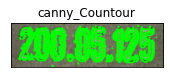

In [402]:
img_con= Im_Countour(img_thresh)
Image_Show(img_con,'canny_Countour')

## USING GAUSSIAN ADAPTIVE THRESHOLDING AND NOISE REDUCTION I/P TO MODEL


##### GAUSSIAN ADAPTIVE THRESHOLDING

In [275]:
#Img_Show(img,'img_test')

In [403]:
img_gray=Im_Gray(image)

In [219]:
#Img_Show(img_gray,'img_gray')

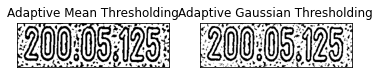

In [404]:
M, G =Adaptive_Thresholding('test.png')

#### NOISE REDUCTION FOLLOWED THRESHOLDING

###### closing function - erosion followed by dilation

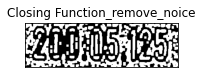

In [360]:
kernel = np.ones((5,5),np.uint8)

opening = cv2.morphologyEx(M, cv2.MORPH_OPEN, kernel)
Image_Show(opening,'Closing Function_remove_noice')

###### Gaussian Blur

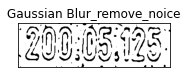

In [362]:
blur = cv2.GaussianBlur(M,(13,13),0)
thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]
Image_Show(thresh,'Gaussian Blur_remove_noice')

###### Image Denoising in OpenCV

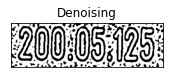

In [377]:
# Denoising
im=cv.fastNlMeansDenoising(M,None,10,7,21)
Image_Show(im,'Denoising')

###### Method by area of the contours

20


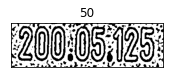

In [417]:
# do connected components processing
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(M, None, None, None, 8, cv2.CV_32S)
print( nlabels)
#get CC_STAT_AREA component as stats[label, COLUMN] 
areas = stats[1:,cv2.CC_STAT_AREA]

result = np.zeros((labels.shape), np.uint8)
a=50
for i in range(0, nlabels - 1):
    if areas[i] >= a:   #keep
        result[labels == i + 1] = 255
Image_Show(result,a)

20


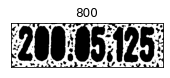

In [425]:
# do connected components processing
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(M, None, None, None, 8, cv2.CV_32S)
print( nlabels)
#get CC_STAT_AREA component as stats[label, COLUMN] 
areas = stats[1:,cv2.CC_STAT_AREA]

result = np.zeros((labels.shape), np.uint8)
a=800
for i in range(0, nlabels - 1):
    if areas[i] >= a:   #keep
        result[labels == i + 1] = 255
Image_Show(result,a)

In [436]:
#Converting Black into Blue or Red , try different models

20


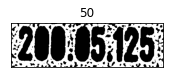

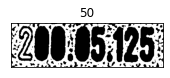

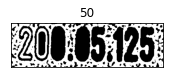

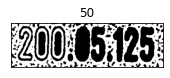

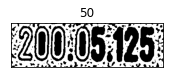

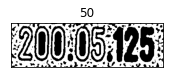

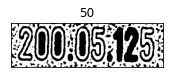

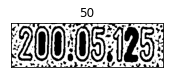

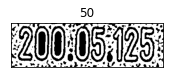

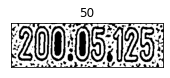

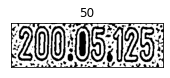

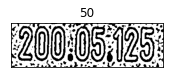

In [354]:
# do connected components processing
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(M, None, None, None, 8, cv2.CV_32S)
print( nlabels)
#get CC_STAT_AREA component as stats[label, COLUMN] 
areas = stats[1:,cv2.CC_STAT_AREA]

result = np.zeros((labels.shape), np.uint8)
a=50
for i in range(0, nlabels - 1):
    if areas[i] >= a:   #keep
        result[labels == i + 1] = 255
        Image_Show(result,a)

#### Laplacian Edge Sharpening

###### NOT OK

In [14]:
import cv2
import cv2 as cv
import numpy as np

In [15]:
image = cv2.imread('test.jpg')

In [16]:
#convert to gray image
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [17]:
#detect gradients, edges
lap_edges = cv.Laplacian(img_gray, cv.CV_64F) #detect gradients, edges


In [18]:
lap_edges = np.uint8(np.absolute(lap_edges))

In [19]:
#cv.imshow("Laplacian Edges", lap_edges)
#cv.waitKey(0)

In [20]:
cv.imwrite('image.jpg',lap_edges) #laplasian edge detected image saved as jpg

True

In [8]:
image_lap=cv2.imread('lap_edges.jpg') #canny edge detected image load to image placeholder

In [9]:
img_lap_grey = cv2.cvtColor(image_lap, cv2.COLOR_BGR2GRAY)

In [10]:
# apply binary thresholding

ret, thresh = cv2.threshold(img_lap_grey, 150, 255, cv2.THRESH_BINARY)

# visualize the binary image

#cv2.imshow('Binary image', thresh)

#cv2.waitKey(0)

cv2.imwrite('image_thres1.jpg', thresh)

#cv2.destroyAllWindows()


True

In [36]:
#cv2.imshow('image',img_gray)
#cv2.waitKey(3000)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [11]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE

contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

                                      

# draw contours on the original image

image_copy = image.copy()

cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

                

# see the results

cv2.imshow('None approximation', image_copy)

cv2.waitKey(0)

cv2.imwrite('contours_none_image1.jpg', image_copy)

cv2.destroyAllWindows()


### Sobel Edge Detector

In [4]:
#convert to gray image
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#detect sobel gradients
sobel_x_edges = cv.Sobel(gray_image, cv.CV_64F,1, 0)
sobel_y_edges = cv.Sobel(gray_image, cv.CV_64F,0, 1)

#convert all -ve pixels to positives
sobel_x_edges = np.uint8(np.absolute(sobel_x_edges))
sobel_y_edges = np.uint8(np.absolute(sobel_y_edges))

#show images
#cv.imshow("Sobel X Edges", sobel_x_edges)
#cv.imshow("Sobel y Edges", sobel_y_edges)

#cv.waitKey(0)

In [5]:
cv.imwrite('sobel_x_edges.jpg',sobel_x_edges) #sobel edge detected image saved as jpg
cv.imwrite('sobel_y_edges.jpg',sobel_y_edges)

True

In [6]:
image=cv2.imread('sobel_x_edges.jpg') #canny edge detected image load to image placeholder